In [3]:
#!pip install catboost
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


import warnings

warnings.filterwarnings('ignore')

In [4]:
cancer=pd.read_csv("BreastCancer.csv",index_col=0)
lbl=LabelEncoder()
cancer['Class']=lbl.fit_transform(cancer['Class'])
cancer.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,0
63375,9,1,2,6,4,10,7,7,2,1
76389,10,4,7,2,2,8,6,1,1,1
95719,6,10,10,10,8,10,7,10,7,1
128059,1,1,1,1,2,5,5,1,1,0


In [5]:
X=cancer.drop('Class',axis=1)
y=cancer['Class']

In [6]:
cat=CatBoostClassifier(random_state=23)
params={'max_depth':[2,3,4,5,6,None],
        'learning_rate':np.linspace(0.001,0.999,10),
        'n_estimators':[50,100,150]}
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [7]:
gcv=GridSearchCV(cat,param_grid=params,cv=kfold,scoring="neg_log_loss")
gcv.fit(X,y)

Streaming output truncated to the last 5000 lines.
50:	learn: 0.0159391	total: 15.9ms	remaining: 30.9ms
51:	learn: 0.0158615	total: 16.2ms	remaining: 30.6ms
52:	learn: 0.0154426	total: 16.6ms	remaining: 30.4ms
53:	learn: 0.0147966	total: 16.9ms	remaining: 30.1ms
54:	learn: 0.0147174	total: 17.3ms	remaining: 29.8ms
55:	learn: 0.0144037	total: 17.6ms	remaining: 29.5ms
56:	learn: 0.0140191	total: 17.9ms	remaining: 29.2ms
57:	learn: 0.0139480	total: 18.2ms	remaining: 28.9ms
58:	learn: 0.0136771	total: 18.6ms	remaining: 28.7ms
59:	learn: 0.0134288	total: 18.9ms	remaining: 28.4ms
60:	learn: 0.0132000	total: 19.3ms	remaining: 28.2ms
61:	learn: 0.0130126	total: 19.7ms	remaining: 27.9ms
62:	learn: 0.0129007	total: 20.2ms	remaining: 27.8ms
63:	learn: 0.0127555	total: 20.6ms	remaining: 27.6ms
64:	learn: 0.0124972	total: 21ms	remaining: 27.4ms
65:	learn: 0.0124390	total: 21.3ms	remaining: 27.1ms
66:	learn: 0.0120866	total: 21.7ms	remaining: 26.9ms
67:	learn: 0.0118592	total: 22ms	remaining: 26.6ms

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7bf28854db40>,
             param_grid={'learning_rate': array([0.001     , 0.11188889, 0.22277778, 0.33366667, 0.44455556,
       0.55544444, 0.66633333, 0.77722222, 0.88811111, 0.999     ]),
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_log_loss')

In [8]:
print("best parameter :",gcv.best_params_)
print("best score :",gcv.best_score_)

best parameter : {'learning_rate': 0.11188888888888888, 'max_depth': 4, 'n_estimators': 100}
best score : -0.10610890461643303


In [19]:
y_pred = gcv.predict(X)

In [28]:
bm_cat = gcv.best_estimator_

In [10]:
df_imp = pd.DataFrame({'variable':bm_cat.feature_names_,
                       "importance":bm_cat.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp = df_imp.sort_values(by ='importance')

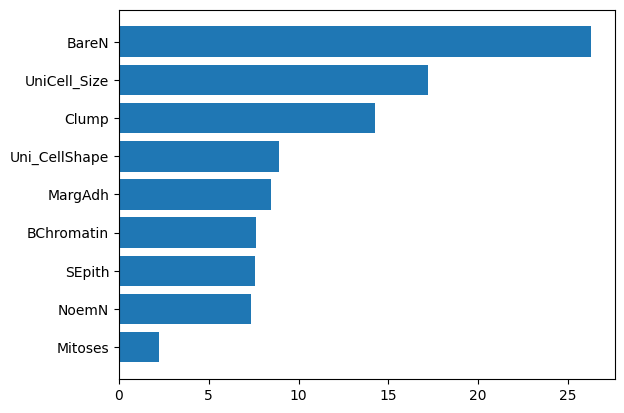

In [11]:
plt.barh(df_imp.variable,df_imp.importance);